#### Rating vs Earnings
To do list: 
1. Get data
2. Create data frame
3. Create plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import os

In [2]:
path = 'Output_files/ratings.csv'
ratings_df = pd.read_csv(path)
ratings_df

,Unnamed: 0,Title,TMDb,IMDb,Rotten Tomatoes,Metascore,Awards,Revenue,Budget,Release Year,Release Month
0,0,Star Wars: The Force Awakens,7.4,7.9,93.0,80.0,Nominated for 5 Oscars. Another 62 wins & 131 ...,2068223624,245000000,2015,12
1,1,Jurassic World,6.7,7.0,70.0,59.0,15 wins & 58 nominations.,1671713208,150000000,2015,6
2,2,Furious 7,7.3,7.1,82.0,67.0,Nominated for 1 Golden Globe. Another 35 wins ...,1515047671,190000000,2015,4
3,3,Avengers: Age of Ultron,7.3,7.3,75.0,66.0,8 wins & 49 nominations.,1405403694,250000000,2015,4
4,4,Minions,6.4,6.4,55.0,56.0,Nominated for 1 BAFTA Film Award. Another 4 wi...,1156730962,74000000,2015,6
...,...,...,...,...,...,...,...,...,...,...,...
91,91,It Chapter Two,6.9,6.5,62.0,58.0,5 wins & 30 nominations.,473093228,79000000,2019,9
92,92,Pokémon Detective Pikachu,7.0,6.6,67.0,53.0,9 nominations.,433005346,150000000,2019,5
93,93,Alita: Battle Angel,7.2,7.3,61.0,53.0,10 wins & 24 nominations.,404852543,170000000,2019,1
94,94,Godzilla: King of the Monsters,6.7,6.0,42.0,48.0,6 wins & 14 nominations.,386600138,170000000,2019,5


In [3]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       96 non-null     int64  
 1   Title            96 non-null     object 
 2   TMDb             96 non-null     float64
 3   IMDb             96 non-null     float64
 4   Rotten Tomatoes  96 non-null     float64
 5   Metascore        95 non-null     float64
 6   Awards           96 non-null     object 
 7   Revenue          96 non-null     int64  
 8   Budget           96 non-null     int64  
 9   Release Year     96 non-null     int64  
 10  Release Month    96 non-null     int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 8.4+ KB


In [4]:
# Clean Data
clean_df = ratings_df[["Title","Budget","Revenue","Rotten Tomatoes","TMDb","IMDb","Metascore"]]

clean_df.head(20)

,Title,Budget,Revenue,Rotten Tomatoes,TMDb,IMDb,Metascore
0,Star Wars: The Force Awakens,245000000,2068223624,93.0,7.4,7.9,80.0
1,Jurassic World,150000000,1671713208,70.0,6.7,7.0,59.0
2,Furious 7,190000000,1515047671,82.0,7.3,7.1,67.0
3,Avengers: Age of Ultron,250000000,1405403694,75.0,7.3,7.3,66.0
4,Minions,74000000,1156730962,55.0,6.4,6.4,56.0
5,Spectre,245000000,880674609,63.0,6.5,6.8,60.0
6,Inside Out,175000000,857611174,98.0,7.9,8.1,94.0
7,Mission: Impossible - Rogue Nation,150000000,682330139,94.0,7.2,7.4,75.0
8,The Hunger Games: Mockingjay - Part 2,160000000,653428261,69.0,6.9,6.6,65.0
9,The Martian,108000000,630161890,91.0,7.7,8.0,80.0


The r-squared is: 0.22594909665880133


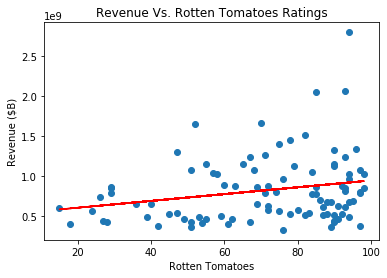

In [5]:
x_values = clean_df["Rotten Tomatoes"]
y_values = clean_df["Revenue"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)  
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(round(intercept,2)))  
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-" )                   
plt.annotate(line_eq,(6,0),fontsize=12,color="blue")                    
plt.title('Revenue Vs. Rotten Tomatoes Ratings')                    
plt.xlabel('Rotten Tomatoes')                    
plt.ylabel('Revenue ($B)') 
print(f"The r-squared is: {rvalue}")                    
plt.savefig("Images/RottenTomates_Revenue.png")

plt.show()                  

The r-squared is: 0.3004891560154141


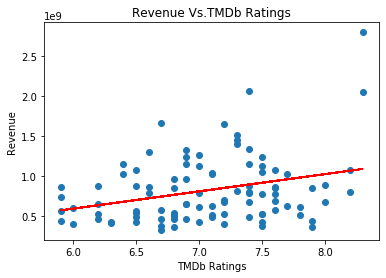

In [10]:
x_values = clean_df["TMDb"]
y_values = clean_df["Revenue"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)  
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(round(intercept,2)))  
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-" )                   
plt.annotate(line_eq,(6,0),fontsize=12,color="blue")                    
plt.title('Revenue Vs.TMDb Ratings')                    
plt.xlabel('TMDb Ratings')                    
plt.ylabel('Revenue') 
print(f"The r-squared is: {rvalue}")                    
plt.savefig("Images/TMDb_Revenue.png")

plt.show()     

The r-squared is: 0.2831761177840927


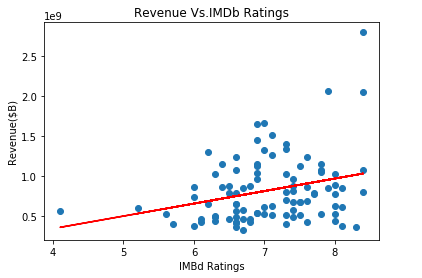

In [11]:
x_values = clean_df["IMDb"]
y_values = clean_df["Revenue"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)  
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(round(intercept,2)))  
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-" )                   
plt.annotate(line_eq,(6,0),fontsize=12,color="blue")                    
plt.title('Revenue Vs.IMDb Ratings')                    
plt.xlabel('IMBd Ratings')                    
plt.ylabel('Revenue($B)') 
print(f"The r-squared is: {rvalue}")                    
plt.savefig("Images/IMBd_Revenue.png")

plt.show()     

The r-squared is: 0.2831761177840927


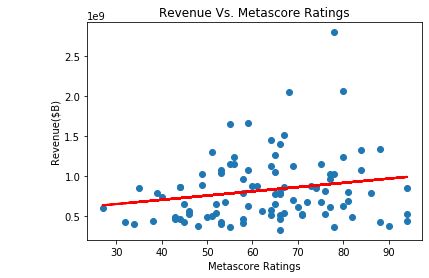

In [13]:
x_values = clean_df["Metascore"]
y_values = clean_df["Revenue"]

mask = ~np.isnan(x_values) & ~np.isnan(y_values)
slope, intercept, r_value, p_value, std_err = linregress(x_values[mask], y_values[mask])

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)  
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(round(intercept,2)))  

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,color="red",linewidth=2)                   
plt.annotate(line_eq,(6,0),fontsize=14,color="blue")                    
plt.title('Revenue Vs. Metascore Ratings')                    
plt.xlabel('Metascore Ratings')                    
plt.ylabel('Revenue($B)') 
print(f"The r-squared is: {rvalue}")                    
plt.savefig("Images/Metascore_Revenue.png")
# print(slope, intercept, rvalue, pvalue, stderr)
# print(x_values)
# print(y_values)
plt.show()     

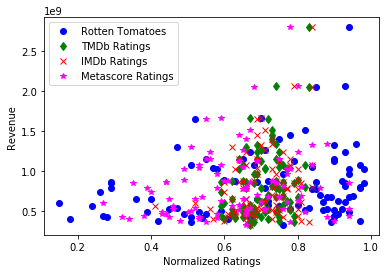

<Figure size 1500x450 with 0 Axes>

In [14]:
# Create variable line graph
RottenTomatoesnormalizedRatings = clean_df["Rotten Tomatoes"]/100
TMDbnormalizedRatings = clean_df["TMDb"]/10
IMDbnormalizedRatings = clean_df["IMDb"]/10
MetascorenormalizedRatings = clean_df["Metascore"]/100
Revenue = clean_df["Revenue"]
# Rotten_Tomatoes_Ratings, = plt.plot(Revenue,RottenTomatoesRatings="o",color="blue", linewedth=1,label="Rotten Tomatoes")
# TMDb_Ratings, = plt.plot(Revenue,TMDbRatings="d",color="green", liinewedth=1,label="TMDb Ratings")
plt.plot(RottenTomatoesnormalizedRatings,Revenue,marker="o",color="blue", linewidth=0,label="Rotten Tomatoes")
plt.plot(TMDbnormalizedRatings,Revenue,marker="d",color="green", linewidth=0,label="TMDb Ratings")
plt.plot(IMDbnormalizedRatings,Revenue,marker="x",color="red", linewidth=0,label="IMDb Ratings")
plt.plot(MetascorenormalizedRatings,Revenue,marker="*",color="magenta", linewidth=0,label="Metascore Ratings")
plt.legend()
# plt.legend(handles=[Rotten_Tomatoes_Ratings,TMDb_Ratings], loc="best")
plt.ylabel("Revenue")
plt.xlabel("Normalized Ratings")
#plt.ylim((23,-1))
plt.figure(figsize=(10,3),dpi=150)
plt.savefig("Images/AllRatings_Revenue.png")

plt.show()